In [4]:
import yt
import matplotlib

#matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
cd \\aldaq1.physics.ox.ac.uk\Archer\Robert\Piotr Sims\FullWidthLowIntensity\shot-47-fiducial-full-width-1.0e14Wcm-2    

\\aldaq1.physics.ox.ac.uk\Archer\Robert\Piotr Sims\FullWidthLowIntensity\shot-47-fiducial-full-width-1.0e14Wcm-2


In [11]:
cd \\aldaq1.physics.ox.ac.uk\Archer\Robert\Piotr Sims\2D gap structure\49-5Lbar-2D-hdf5

\\aldaq1.physics.ox.ac.uk\Archer\Robert\Piotr Sims\2D gap structure\49-5Lbar-2D-hdf5


In [39]:
#Load the file
ds = yt.load("lasslab_hdf5_plt_cnt_0010")


yt : [INFO     ] 2022-12-12 15:57:51,987 Parameters: current_time              = 1.0017066047242931e-10
yt : [INFO     ] 2022-12-12 15:57:51,987 Parameters: domain_dimensions         = [32 64  1]
yt : [INFO     ] 2022-12-12 15:57:51,987 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-12 15:57:51,987 Parameters: domain_right_edge         = [0.022 0.027 1.   ]
yt : [INFO     ] 2022-12-12 15:57:51,987 Parameters: cosmological_simulation   = 0.0


In [40]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     8	          2048	            13
  1	    32	          8192	            21
  2	   108	         27648	            31
  3	   304	         77824	            43
----------------------------------------------
   	   452	        115712


t = 1.00170660e-10 = 1.00170660e-10 s = 3.17421669e-18 years

Smallest Cell:
	Width: 2.785e-29 Mpc
	Width: 2.785e-23 pc
	Width: 5.745e-18 AU
	Width: 8.594e-05 cm


In [41]:
ds.field_list

[('flash', 'dens'),
 ('flash', 'depo'),
 ('flash', 'pres'),
 ('flash', 'sumy'),
 ('flash', 'tar2'),
 ('flash', 'tar3'),
 ('flash', 'tar4'),
 ('flash', 'tele'),
 ('flash', 'tion'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'ye')]

In [42]:
ds.domain_width

In [45]:
text_string = float(ds.current_time.to('s'))

In [50]:
List = [text_string]
List.append(text_string)
List

[1.0501531995000593e-11, 1.0501531995000593e-11]

[1.0501531995000593e-11]


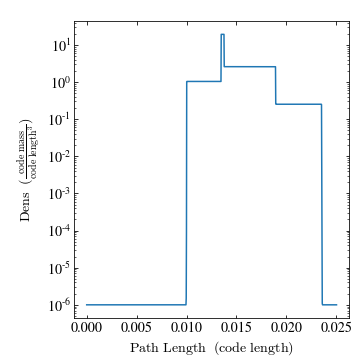

In [21]:
#Line plot. We specify the x,y,z coordinates, and the number of points. Only one coord should change
plot = yt.LinePlot(
    ds, [("dens")],  (0.005, 0.0, 0.0), (0.005, 0.025, 0.0), 1000)
plot.show()

yt : [INFO     ] 2022-12-12 15:57:59,994 xlim = -0.017000 0.039000
yt : [INFO     ] 2022-12-12 15:57:59,994 ylim = -0.014500 0.041500
yt : [INFO     ] 2022-12-12 15:57:59,994 xlim = -0.017000 0.039000
yt : [INFO     ] 2022-12-12 15:57:59,994 ylim = -0.014500 0.041500
yt : [INFO     ] 2022-12-12 15:57:59,994 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



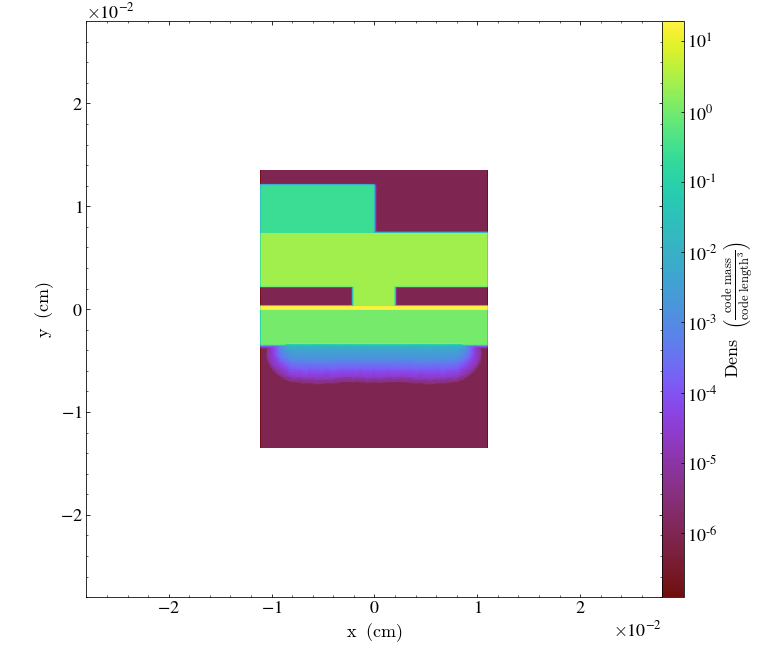

In [43]:
#Slice plot. Say which variable we should slice through 'z', and a width of the slice to take.
#slice = yt.SlicePlot(ds, "z", ("dens"), width=(0.022, "cm"))
slice = yt.SlicePlot(ds, "z", ("dens"), width=(0.056, "cm"))
slice.show()

yt : [INFO     ] 2022-12-12 16:01:08,138 Making a fixed resolution buffer of (dens) 1000 by 1000


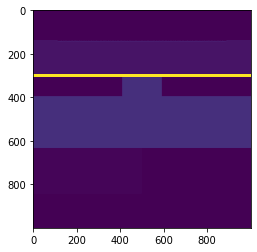

In [73]:
#Now we formally slice the data. Again, say which axis to slice normal too, and where on that axis we should slice.
slice = ds.slice("z", 0)

#Choose a width, and resolution, as above.
width = (0.022,  "cm")  # we want a 1.5 mpc view
res = [1000, 1000]  # create an image with 1000x1000 pixels

#Generate the frb. To do this choose a center for the domain. The domain width tells us the extremes, so I have just picked in the middle
frb = slice.to_frb(width, res, center=[0.011,0.018, 0])


#Show the frb in terms of density
plt.imshow(frb["dens"].d)



In [74]:
#Import the density from the frb
density = frb["dens"].d

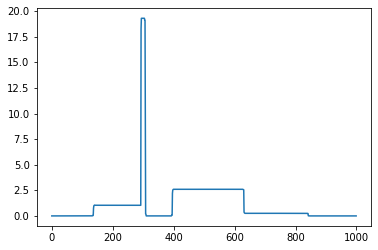

In [75]:
#Plot a slice through of the density
plt.plot(density[:,100])
plt.show()

In [71]:
len(density[:,1])

1000

In [72]:
density_array = np.append(density[:,1], density[:,2])

In [73]:
density_array

array([9.99999997e-07, 9.99999997e-07, 9.99999997e-07, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [74]:
len(density_array)

2000

In [75]:
type(density_array)

numpy.ndarray

In [76]:
#Here, I have combined a number of the density linethroughs into one array
density_array = np.column_stack((density[:,100], density[:,200], density[:,300], density[:,400], density[:,500], density[:,600], density[:,700], density[:,800], density[:,900]))
density_array.shape
density_array[density_array==0]=0.0001

In [77]:
#Reshape that array
x = np.arange(0, 9, 1)
y = np.arange(0, 1000, 1)

X, Y = np.meshgrid(x, y)

In [78]:
X.shape


(1000, 9)

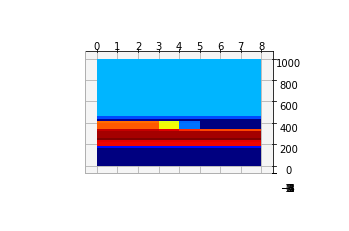

In [79]:
#And now we can plot it without stressing over the frb
fig = plt.figure()
ax = fig.gca(projection='3d', proj_type = 'ortho')
surf = ax.plot_surface(X, Y, np.log10(density_array), cmap=cm.jet, linewidth=0, antialiased=False)
ax.view_init(azim=270, elev=90)